# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [2]:
train_data = pd.read_csv("../datasets/train.csv")
test_data = pd.read_csv("../datasets/test.csv")

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1455 non-null   float64
 4   LotArea        1455 non-null   int64  
 5   Street         1455 non-null   object 
 6   Alley          1455 non-null   object 
 7   LotShape       1455 non-null   object 
 8   LandContour    1455 non-null   object 
 9   Utilities      1455 non-null   object 
 10  LotConfig      1455 non-null   object 
 11  LandSlope      1455 non-null   object 
 12  Neighborhood   1455 non-null   object 
 13  Condition1     1455 non-null   object 
 14  Condition2     1455 non-null   object 
 15  BldgType       1455 non-null   object 
 16  HouseStyle     1455 non-null   object 
 17  OverallQual    1455 non-null   int64  
 18  OverallCond  

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotFrontage    1456 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          1456 non-null   object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1454 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallCond  

# Handling Missing Values 

## 1. `LotFrontage`

**LotFrontage**: Linear feet of street connected to property

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


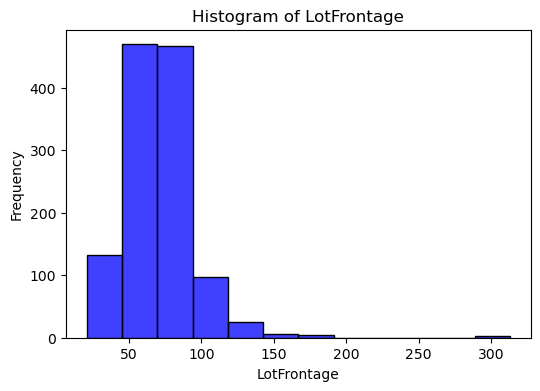

69.0


In [5]:
bins = int(np.ceil(np.log2(1460) + 1))

plt.figure(figsize=(6, 4))
sns.histplot(train_data["LotFrontage"],bins=bins,kde=False,color="blue")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.title('Histogram of LotFrontage')
plt.show()

median_value = train_data['LotFrontage'].median()
print(median_value)

### Imputing Missing Values in `LotFrontage` using Median

In [6]:
median_value = train_data['LotFrontage'].median()
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(median_value)
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(median_value)

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


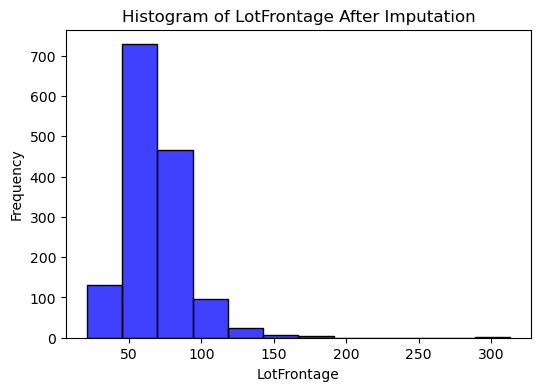

69.0


In [7]:
bins = int(np.ceil(np.log2(1460) + 1))

plt.figure(figsize=(6, 4))
sns.histplot(train_data["LotFrontage"],bins=bins,kde=False,color="blue")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.title('Histogram of LotFrontage After Imputation')
plt.show()

median_value = train_data['LotFrontage'].median()
print(median_value)

## 2. `Alley`

In [8]:
train_data['Alley'] = train_data['Alley'].fillna("No Alley")
test_data['Alley'] = test_data['Alley'].fillna("No Alley")

## 3. `MasVnrType` and `MasVnrArea`

In [9]:
print(train_data["MasVnrType"].unique())
print(test_data["MasVnrType"].unique())

['BrkFace' nan 'Stone' 'BrkCmn']
[nan 'BrkFace' 'Stone' 'BrkCmn']


C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


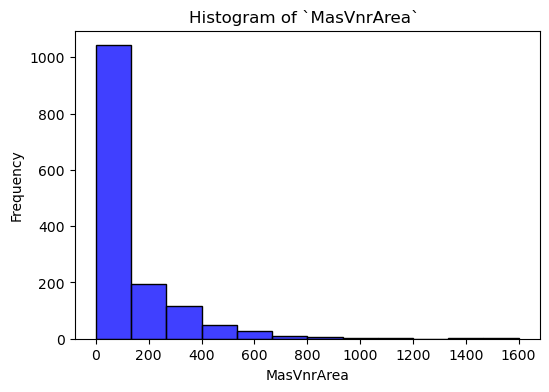

0.0


In [10]:
bins = int(np.ceil(np.log2(1460) + 1))
plt.figure(figsize=(6,4))
sns.histplot(train_data["MasVnrArea"],bins=bins,kde=False,color="blue")
plt.xlabel("MasVnrArea")
plt.ylabel("Frequency")
plt.title('Histogram of `MasVnrArea` ')
plt.show()

median_value = train_data['MasVnrArea'].median()
print(median_value)

In [11]:
count_zero_mas_vnr_area = train_data[train_data['MasVnrArea'] == 0].shape[0]
print(f"Number of rows where 'MasVnrArea' equals 0: {count_zero_mas_vnr_area}")

Number of rows where 'MasVnrArea' equals 0: 861


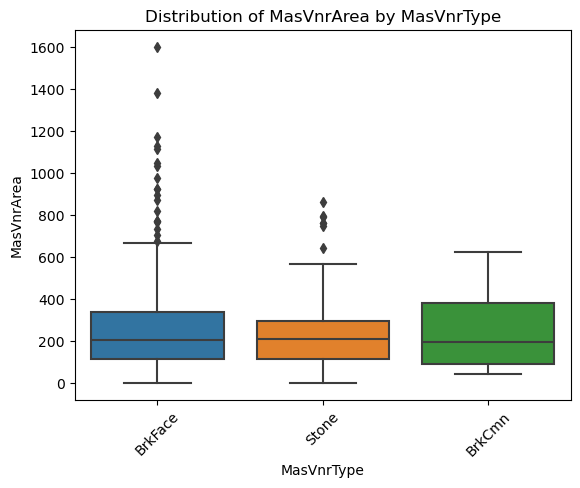

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=train_data, x='MasVnrType', y='MasVnrArea')
plt.title("Distribution of MasVnrArea by MasVnrType")
plt.xticks(rotation=45)
plt.show()


In [13]:
# Impute "No MasVnr" where "MasVnrArea" equals 0 and "MasVnrType" is NaN
train_data.loc[(train_data['MasVnrArea'] == 0) & (train_data['MasVnrType'].isnull()), 'MasVnrType'] = 'No MasVnr'
test_data.loc[(test_data['MasVnrArea'] == 0) & (test_data['MasVnrType'].isnull()), 'MasVnrType'] = 'No MasVnr'

# Impute "No MasVnr" to "MasVnrType" and 0 to "MasVnrArea"  where "MasVnrArea" is NaN and "MasVnrType" is NaN
train_data.loc[(train_data['MasVnrArea'].isnull()) & (train_data['MasVnrType'].isnull()), ['MasVnrArea', 'MasVnrType']] = [0, 'No MasVnr']
test_data.loc[(test_data['MasVnrArea'].isnull()) & (test_data['MasVnrType'].isnull()), ['MasVnrArea', 'MasVnrType']] = [0, 'No MasVnr']

In [14]:
missing_values_count = train_data['MasVnrType'].isnull().sum()
print(f"MasVnrType(train) - {missing_values_count}")
missing_values_count = test_data['MasVnrType'].isnull().sum()
print(f"MasVnrType(test) - {missing_values_count}")

missing_values_count = train_data['MasVnrArea'].isnull().sum()
print(f"MasVnrArea(train) - {missing_values_count}")
missing_values_count = test_data['MasVnrArea'].isnull().sum()
print(f"MasVnrArea(test) - {missing_values_count}")

MasVnrType(train) - 5
MasVnrType(test) - 3
MasVnrArea(train) - 0
MasVnrArea(test) - 0


In [15]:
train_data = train_data.dropna(subset=['MasVnrType'])
test_data = test_data.dropna(subset=['MasVnrType'])

## 3. `BsmtQual` , `BsmtCond` and `BsmtExposure`

In [16]:
# Impute "No Basement" where "BsmtQual", "BsmtCond" and "BsmtExposure" is NaN
train_data.loc[(train_data['BsmtQual'].isnull()) & (train_data['BsmtCond'].isnull()) & (train_data['BsmtExposure'].isnull()), ['BsmtQual', 'BsmtCond','BsmtExposure']] = ['No Basement','No Basement','No Basement']
test_data.loc[(test_data['BsmtQual'].isnull()) & (test_data['BsmtCond'].isnull()) & (test_data['BsmtExposure'].isnull()), ['BsmtQual', 'BsmtCond','BsmtExposure']] = ['No Basement','No Basement','No Basement']

In [17]:
train_data[['BsmtQual','BsmtCond','BsmtExposure']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    1
dtype: int64

In [18]:
test_data[['BsmtQual','BsmtCond','BsmtExposure']].isnull().sum()

BsmtQual        2
BsmtCond        3
BsmtExposure    2
dtype: int64

In [19]:
train_na_BsmtExposure = train_data[train_data["BsmtExposure"].isna()]
train_na_BsmtExposure[["BsmtQual","BsmtCond"]]

,BsmtQual,BsmtCond
948,Gd,TA


- since "BsmtQual" and"BsmtCond" exits in NA of "BsmtExposure" in training set, it was assumed that it is "No Exposure" and imputed as "No Exposure"

In [20]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna("No")

In [21]:
test_na = test_data[test_data[["BsmtQual","BsmtCond","BsmtExposure"]].isna().any(axis=1)]
test_na[["BsmtQual","BsmtCond","BsmtExposure"]]

,BsmtQual,BsmtCond,BsmtExposure
27,Gd,TA,NaN
580,Gd,NaN,Mn
725,TA,NaN,No
757,NaN,Fa,No
758,NaN,TA,No
888,Gd,TA,NaN
1064,TA,NaN,Av


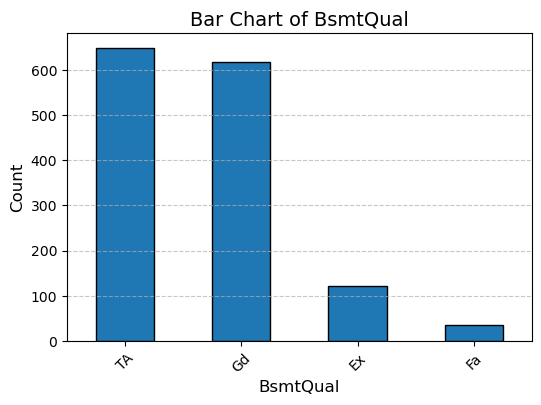

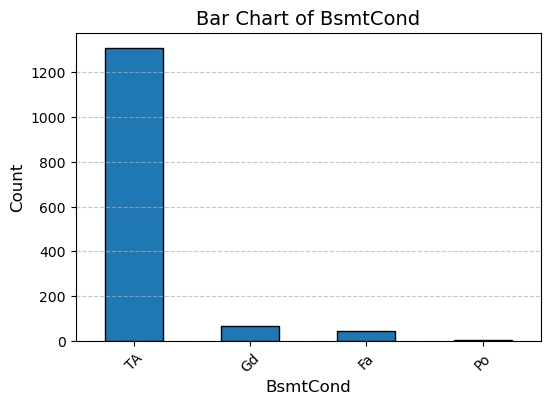

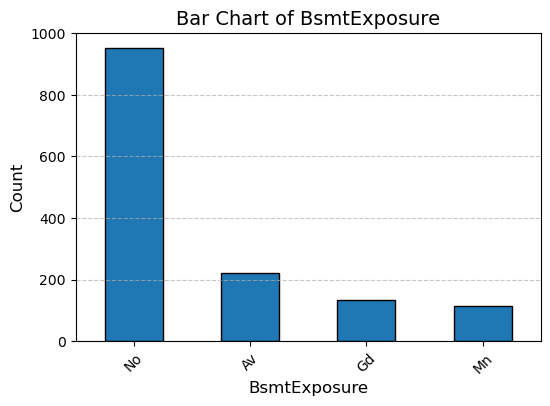

In [3]:
columns = ["BsmtQual", "BsmtCond", "BsmtExposure"]

# Loop through each column to create a bar chart
for column in columns:
    value_counts = train_data[column].value_counts()  # Get value counts for the column
    plt.figure(figsize=(6, 4))  # Create a new figure for each column
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Chart of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [23]:
# Impute missing values with the mode (most frequent value) for each column
for col in ["BsmtQual", "BsmtCond", "BsmtExposure"]:
    mode_value = test_data[col].mode()[0]  
    test_data[col] = test_data[col].fillna(mode_value)  


## 4. `BsmtFinType1` , `BsmtFinType2`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` and `TotalBsmtSF`

In [24]:
columns = ['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
total_basement_zero = train_data.loc[train_data['TotalBsmtSF'] == 0,columns ]
total_basement_zero

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,0,NaN,0,0,0
39,NaN,0,NaN,0,0,0
90,NaN,0,NaN,0,0,0
102,NaN,0,NaN,0,0,0
156,NaN,0,NaN,0,0,0
182,NaN,0,NaN,0,0,0
259,NaN,0,NaN,0,0,0
342,NaN,0,NaN,0,0,0
362,NaN,0,NaN,0,0,0
371,NaN,0,NaN,0,0,0


- Imputed `BsmtFinType1` and `BsmtFinType2` with 'No Basement' where `TotalBsmtSF` is 0 (Total square feet of basement area =0)

In [25]:
train_data.loc[(train_data['TotalBsmtSF'] == 0) , ['BsmtFinType1', 'BsmtFinType2']] = ['No Basement','No Basement']
test_data.loc[(test_data['TotalBsmtSF'] == 0) ,['BsmtFinType1', 'BsmtFinType2']] = ['No Basement','No Basement']

In [26]:
total_basement_na_in_test = test_data[test_data['TotalBsmtSF'].isna()][columns]
total_basement_na_in_test

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_data.loc[(test_data['TotalBsmtSF'].isna()) ,['BsmtFinType1', 'BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2']] = ['No Basement','No Basement',0,0,0,0]

In [28]:
BsmtFinType2_na_in_train = train_data[train_data['BsmtFinType2'].isna()][columns]
BsmtFinType2_na_in_train

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
332,GLQ,1124,NaN,479,1603,3206


In [29]:
# Impute missing value with the most frequent value for BsmtFinType2
mode_value = train_data["BsmtFinType2"].mode()[0]  
train_data["BsmtFinType2"] = train_data["BsmtFinType2"].fillna(mode_value)  

## 5. `Electrical` 

In [30]:
electrical_na_train = train_data[train_data["Electrical"].isna()]
electrical_na_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


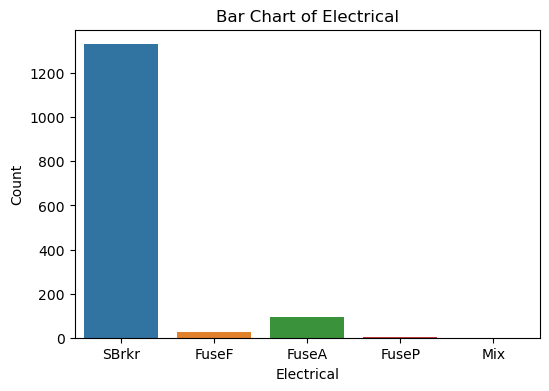

In [31]:
plt.figure(figsize=(6, 4)) 
sns.countplot(data=train_data,x='Electrical')
plt.title('Bar Chart of Electrical')
plt.xlabel('Electrical')
plt.ylabel('Count')
plt.show()

In [32]:
mode_value = train_data['Electrical'].mode()[0]  
train_data['Electrical'] = train_data['Electrical'].fillna(mode_value)  

## 6. `FireplaceQu` 

In [33]:
FireplaceQu_na_train = train_data[train_data["FireplaceQu"].isna()][["Fireplaces","FireplaceQu"]]
FireplaceQu_na_train.describe()

,Fireplaces
count,688.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [34]:
FireplaceQu_na_test = test_data[test_data["FireplaceQu"].isna()][["Fireplaces","FireplaceQu"]]
FireplaceQu_na_test.describe()

,Fireplaces
count,728.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [35]:
train_data.loc[(train_data["FireplaceQu"].isna()),["FireplaceQu"]] = ["No Fireplace"]
test_data.loc[(test_data["FireplaceQu"].isna()),["FireplaceQu"]] = ["No Fireplace"]

## 7. `PoolQC` 

In [36]:
PoolQC_na_train = train_data[train_data["PoolQC"].isna()][["PoolQC","PoolArea"]]
PoolQC_na_train.describe()

,PoolArea
count,1448.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


- As we can observer, all the NA values in `PoolQC` has zero `PoolArea`. That means all the NA values means "No Pool"

In [37]:
train_data.loc[(train_data["PoolQC"].isna()),["PoolQC"]] = ["No Pool"]

In [38]:
PoolQC_na_test = test_data[test_data["PoolQC"].isna()][["PoolQC","PoolArea"]]
PoolQC_na_test.describe()

,PoolArea
count,1453.000000
mean,0.944942
std,21.092470
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,561.000000


In [39]:
# Checking and gettin values which PoolQC is NA But PoolArea is not zero
PoolQC_na_test_has_pool_area = test_data[test_data["PoolQC"].isna() & test_data["PoolArea"] != 0][["PoolQC","PoolArea"]]
PoolQC_na_test_has_pool_area

,PoolQC,PoolArea
1139,NaN,561


- As we can observer,exept one, all the NA values in `PoolQC` has zero `PoolArea`. That means all the NA values means "No Pool"

In [40]:
test_data.loc[(test_data["PoolQC"].isna() & test_data["PoolArea"] == 0),["PoolQC"]] = ["No Pool"]

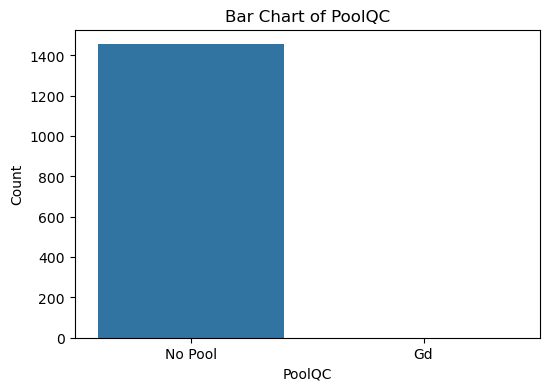

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=test_data,x="PoolQC")
plt.title('Bar Chart of PoolQC')
plt.xlabel('PoolQC')
plt.ylabel('Count')
plt.show()

In [42]:
filtered_data = train_data[train_data['PoolQC'] != "No Pool"]
mode_value = filtered_data['PoolQC'].mode()[0]  
test_data['PoolQC'] = test_data['PoolQC'].fillna(mode_value)  

Gd
